# Chapter 8: Advanced Statistics

The key topics that we will cover in this chapter are as follows:
<br>
 • Point estimates <br>
 • Confidence intervals <br>
 • The central limit theorem <br>
 • Hypothesis testing

In [93]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random 

<hr>

## Point estimates

A point estimate is an estimate of a population parameter based on sample data.
<br><br>
For example, suppose there is a company of 9,000 employees and we are interested in ascertaining the average length of breaks
taken by employees in a single day. As we probably cannot ask every single person, we will take a sample of the 9,000 people and take a mean of the sample. This sample mean will be our point estimate.

The following code is broken into three parts: <br><br>
• We will use the probability distribution, known as the Poisson distribution,
to randomly generate 9,000 answers to the question: for how many minutes
in a day do you usually take breaks? This will represent our "population".
<br>
• We will take a sample of 100 employees (using the Python random sample
method) and find a point estimate of a mean (called a sample mean).
<br>
• Compare our sample mean (the mean of the sample of 100 employees) to our
population mean.

In [94]:
#The seed() method is used to initialize the random number generator.
np.random.seed(1234)

long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
short_breaks = stats.poisson.rvs(loc=10, mu=15, size=6000)
breaks = np.concatenate((long_breaks, short_breaks))

#representing the whole population
breaks.mean()

39.99944444444444

In [78]:
long_breaks

array([62, 69, 77, ..., 68, 73, 74])

Text(0.5, 1.0, 'Long Breaks Sample')

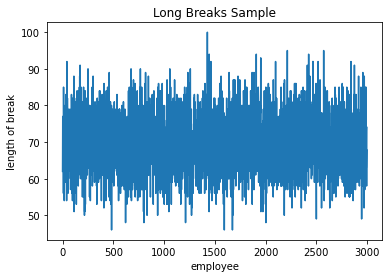

In [79]:
plt.plot(long_breaks)
plt.xlabel('employee')
plt.ylabel('length of break')
plt.title('Long Breaks Sample')

<AxesSubplot:>

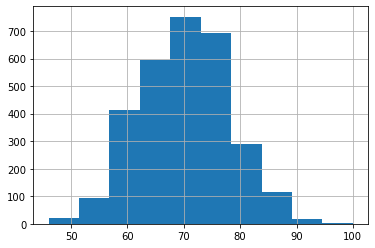

In [80]:
pd.Series(long_breaks).hist()

<hr>

In [81]:
short_breaks

array([20, 25, 22, ..., 30, 21, 29])

Text(0.5, 1.0, 'Short Breaks Sample')

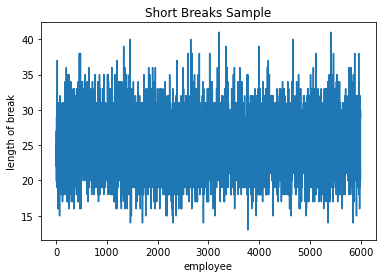

In [26]:
plt.plot(short_breaks)
plt.xlabel('employee')
plt.ylabel('length of break')
plt.title('Short Breaks Sample')

<AxesSubplot:>

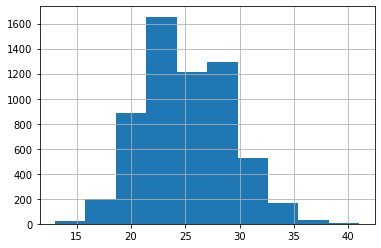

In [82]:
pd.Series(short_breaks).hist()

<hr>

In [83]:
breaks

array([62, 69, 77, ..., 30, 21, 29])

Text(0.5, 1.0, 'Breaks Sample')

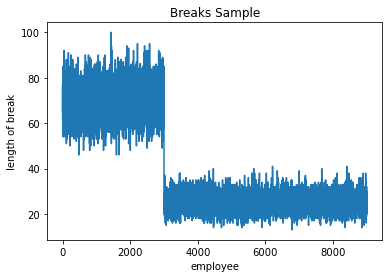

In [27]:
plt.plot(breaks)
plt.xlabel('employee')
plt.ylabel('length of break')
plt.title('Breaks Sample')

<AxesSubplot:>

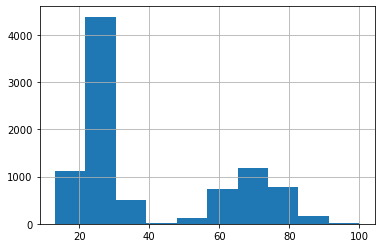

In [84]:
pd.Series(breaks).hist()

Our average company break length is about 40 minutes. Remember that our
population is the entire company's employee size of 9,000 people, and our parameter is
40 minutes. In the real world, our goal would be to estimate the population parameter
because we would not have the resources to ask every single employee in a survey
their average break length for many reasons. Instead, we will use a point estimate.
So, to make our point, we want to simulate a world where we ask 100 random
people about the length of their breaks. To do this, let's take a random sample of 100
employees out of the 9,000 employees we simulated, as shown:

In [109]:
# taking a sample of 100 employees
sample_breaks = np.random.choice(a = breaks, size=100)

print(sample_breaks.mean() )

37.55


In [107]:
# difference between means 
breaks.mean() - sample_breaks.mean()

1.9494444444444454

This is extremely interesting, because with only about 1% of our population (100 out
of 9,000), we were able to get within very small different minutes of our population parameter and get a
very accurate estimate of our population mean. Not bad!

<hr>

## Sampling distributions

In Chapter 7, Basic Statistics, we mentioned how much we love when data follows
the normal distribution. One of the reasons for this is that many statistical tests
(including the ones we will use in this chapter) rely on data that follows a normal
pattern, and for the most part, a lot of real-world data is not normal (surprised?).
Take our employee break data for example, you might think I was just being fancy
creating data using the Poisson distribution, but I had a reason for this—I specifically
wanted non-normal data, as shown:

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

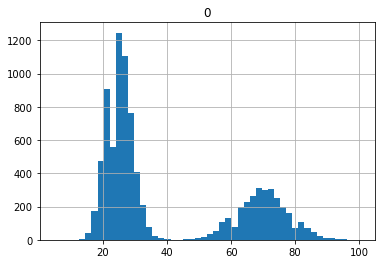

In [86]:
pd.DataFrame(breaks).hist(bins=50,range=(5,100))

As you can see, our data is definitely not following a normal distribution, it appears
to be bi-modal, which means that there are two peaks of break times, at around 25
and 70 minutes. As our data is not normal, many of the most popular statistics tests
may not apply, however, if we follow the given procedure, we can create normal
data!

First off, we will need to utilize what is known as a sampling distribution, which is
a distribution of point estimates of several samples of the same size. Our procedure
for creating a sampling distribution will be the following: <br>
1. Take 500 different samples of the break times of size 100 each. <br>
2. Take a histogram of these 500 different point estimates (revealing their distribution).
<br><br>
The number of elements in the sample (100) was arbitrary, but large enough to be
a representative sample of the population. The number of samples I took (500) was
also arbitrary, but large enough to ensure that our data would converge to a normal
distribution:

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

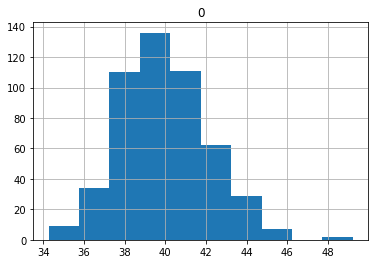

In [41]:
point_estimates = []
for x in range(500):         # Generate 500 samples
    sample = np.random.choice(a= breaks, size=100) #take a sample of 100 points
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).hist()

In [105]:
np.array(point_estimates).mean()

39.96976

What's more, as we take more and more samples, the mean of the sampling
distribution will approach the true population mean, as shown:

In [42]:
breaks.mean() - np.array(point_estimates).mean()

0.029684444444441738

<hr>

## Confidence intervals

A confidence interval is a range of values based on a point estimate that contains the
true population parameter at some confidence level.
Confidence is an important concept in advanced statistics. Its meaning is sometimes
misconstrued. Informally, a confidence level does not represent a "probability of
being correct"; instead, it represents the frequency that the obtained answer will
be accurate. For example, if you want to have a 95% chance of capturing the true
population parameter using only a single point estimate, we would have to set our
confidence level to 95%.

Calculating a confidence interval involves finding a point estimate, and then,
incorporating a margin of error to create a range. The margin of error is a value
that represents our certainty that our point estimate is accurate and is based on
our desired confidence level, the variance of the data, and how big your sample is.
There are many ways to calculate confidence intervals; for the purpose of brevity
and simplicity, we will look at a single way of taking the confidence interval of a
population mean. For this confidence interval, we need the following:
<br><br>
• A point estimate. For this, we will take our sample mean of break lengths
from our previous example.
<br>
• An estimate of the population standard deviation, which represents the
variance in the data.
°° This is calculated by taking the sample standard deviation (the
standard deviation of the sample data) and dividing that number by
the square root of the population size.
<br>
• The degrees of freedom (which is the -1 sample size).
<br><br>
Obtaining these numbers might seem arbitrary but, trust me, there is a reason for
all of them. However, again for simplicity, I will use prebuilt Python modules, as
shown, to calculate our confidence interval and, then, demonstrate its value:

In [102]:
sample_size = 100
sample = np.random.choice(a= breaks, size = sample_size)

# sample mean
sample_mean = sample.mean()

# sample standard deviation
sample_stdev = sample.std()    

# population Standard deviation estimate
sigma = sample_stdev/math.sqrt(sample_size)  

stats.t.interval(alpha = 0.95,              # Confidence level
                 df= sample_size - 1,       # Degrees of freedom
                 loc = sample_mean,         # Sample mean
                 scale = sigma)             # Standard deviation estimate

(37.109721736913315, 45.85027826308668)

To reiterate, this range of values (from 36.36 to 45.44) represents a confidence
interval for the average break time with a 95% confidence.
We already know that our population parameter is 39,99, and note that the interval
includes the population mean of 39.99.
I mentioned earlier that the confidence level was not a percentage of accuracy of our
interval but the percent chance that the interval would even contain the population
parameter at all.
<br>
To better understand the confidence level, let's take 10,000 confidence intervals and
see how often our population mean falls in the interval. First, let's make a function,
as illustrated, that makes a single confidence interval from our breaks data:

In [49]:
def makeConfidenceInterval():
    sample_size = 100
    sample = np.random.choice(a= breaks, size = sample_size)

    sample_mean = sample.mean()
    # sample mean

    sample_stdev = sample.std()    
    # sample standard deviation

    sigma = sample_stdev/math.sqrt(sample_size)  
    # population Standard deviation estimate

    return stats.t.interval(alpha = 0.95,       # Confidence level
                     df= sample_size - 1,       # Degrees of freedom
                     loc = sample_mean,         # Sample mean
                     scale = sigma)             # Standard deviation estimate

Now that we have a function that will create a single confidence interval, let's create
a procedure that will test the probability that a single confidence interval will contain
the true population parameter, 39.99:
<br>
1. Take 10,000 confidence intervals of the sample mean.
<br>
2. Count the number of times that the population parameter falls into our confidence intervals.
<br>
3. Output the ratio of the number of times the parameter fell into the interval by 10,000:

In [110]:
times_in_interval = 0.
for i in range(10000):
    interval = makeConfidenceInterval()
    if 39.99 >= interval[0] and 39.99 <= interval[1]:
    # if 39.99 falls in the interval
        times_in_interval += 1

print(times_in_interval / 10000)

0.9463


Success! We see that about 95% of our confidence intervals contained our actual
population mean. Estimating population parameters through point estimates and
confidence intervals is a relatively simple and powerful form of statistical inference.
<hr>

## One sample t-tests

The one sample t-test is a statistical test used to determine whether a quantitative
(numerical) data sample differs significantly from another dataset (the population or
another sample). Suppose, in our previous employee break time example, we look,
specifically, at the engineering department's break times, as shown:

In [115]:
long_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=55, size=100)
short_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15, size=300)
engineering_breaks = np.concatenate((long_breaks_in_engineering, short_breaks_in_engineering))

print(breaks.mean())
print(engineering_breaks.mean())

39.99944444444444
35.0325


H0 = the engineering department takes breaks the same as the company as a whole

Ha = (engineering takes longer breaks)
Ha = (engineering takes shorter breaks)
<br>
Choose a significance level (usually called alpha or α).
We will choose a 95% significance level, which means that our alpha would
actually be 1 - .95 = .05

<br> page 175 in the book

When the data is showing very strong evidence against the null hypothesis, the test
statistic becomes large (either positive or negative) and the p-value usually becomes
very small, which means that our test is showing powerful results and what is
happening is, probably, not happening by chance.
In the case of a t-test, a t value is our test statistic, as shown:

In [116]:
t_statistic, p_value = stats.ttest_1samp(a = engineering_breaks,  # Sample data
                                         popmean= breaks.mean())  # Population mean

In [117]:
t_statistic, p_value

(-5.53989579151747, 5.5042187176402235e-08)

The test result shows that the t value is -5.742. This is a standardized metric that
reveals the deviation of the sample mean from the null hypothesis. The p value is
what gives us our final answer. Our p-value is telling us how often our result would
appear by chance. So, for example, if our p-value was .06, then that would mean we
should expect to observe this data by chance about 6% of the time. This means that
about 6% of samples would yield results like this.
<br><br>
We are interested in how our p-value compares to our significance level: <br>
• If the p-value is less than the significance level, then we can reject the null hypothesis
<br>
• If the p-value is greater than the significance level, then we failed to reject the
null hypothesis
<br><br>
Our p value is way lower than .05 (our chosen significance level), which means that
we may reject our null hypothesis in favor for the alternative. This means that the
engineering department seems to take different break lengths than the company
as a whole!

<hr>

## Example of a chi-square test for goodness of fit

In [56]:
observed = [102, 178, 186, 34]
expected = [156, 165.5, 147, 31.5]

In [59]:
chi_squared, p_value = stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts
chi_squared, p_value

(30.1817679275599, 1.26374310311106e-06)

In [66]:
observed = np.array([[134, 54],[110, 48]])
chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency(observed= observed)
chi_squared, p_value

(0.04762692369491045, 0.82724528704422262)